# Deutsch-Jozsa Algorithm (simulation)

## Step 1. Map the problem

### Setup

In [85]:
# Qiskit imports
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Plotting routines
from qiskit.visualization import plot_distribution


In [86]:
# Code to run on a simulator:
 
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
backend = FakeBrisbane()

### Create a circuit

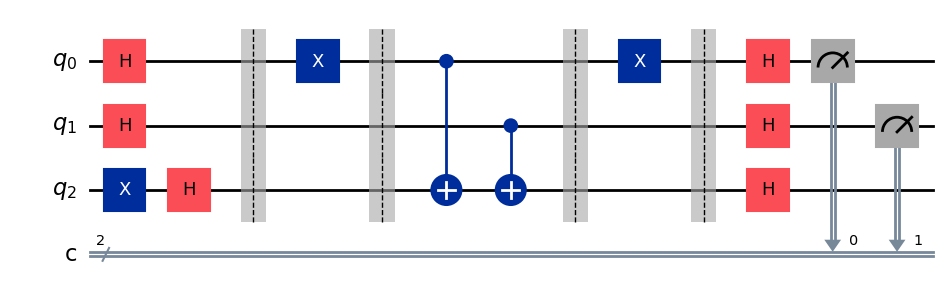

In [87]:
# n qubit
n = 2
# Create a circuit with n+1 qubits
q = QuantumRegister(n+1, 'q')
c = ClassicalRegister(n, 'c')
qc= QuantumCircuit(q, c)

# Initialize last qubit to 1
qc.x(n)

# Generate all superpositions
qc.h(range(n+1))

# Balanced function
qc.barrier()
qc.x(0)
qc.barrier()
for q in range(n):
    qc.cx(q, n)
qc.barrier()
qc.x(0)
qc.barrier()

qc.h(range(n+1))

# Measure
qc.measure(0,0)
qc.measure(1,1)
# Drawing the circuit
qc.draw(output="mpl")

## Step 2: Optimize the problem

### ISA circuit

In [88]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

isa_circuit = pm.run(qc)
#isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")

## Step 3. Execute using Qiskit primitives

In [89]:
# To run on local simulator:
#   1. Use the SatetvectorSampler from qiskit.primitives instead
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1_000
result = sampler.run([isa_circuit]).result()
counts = result[0].data.c.get_counts()

## Step 4. Post-process, return result in classical format

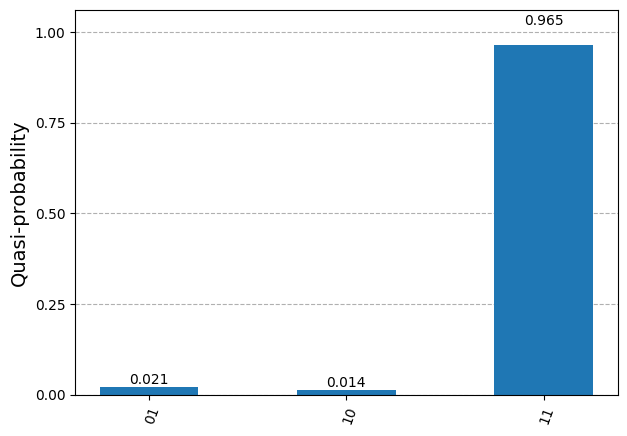

In [ ]:
plot_distribution(counts)

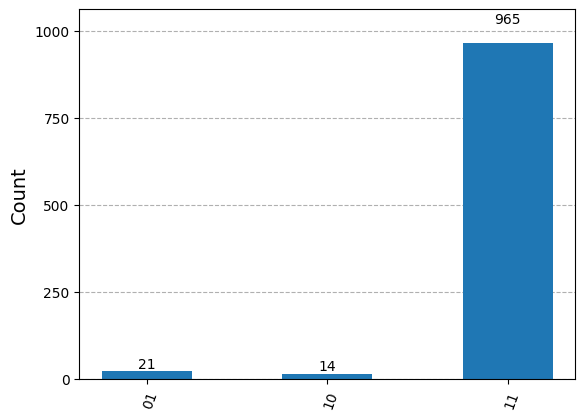

In [91]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)